<a href="https://colab.research.google.com/github/ThiviruDulanaka/ML-Coursework-Final/blob/main/ML_coursework-(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd



In [ ]:
# Loading the dataset
data = pd.read_csv("bank-full.csv", sep=';', quotechar='"')  # Using ';' as the delimiter for this dataset
print("Dataset loaded successfully!")



Dataset loaded successfully!


In [ ]:
# Displaying the first few rows to confirm successful loading
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")  # Printing dimensions
data.head()

The dataset contains 45211 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Data Exploration part
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [ ]:
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
print(data['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Checking for missing values
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
print(missing_values)



Missing Values per Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<ipython-input-65-74c218ff11c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


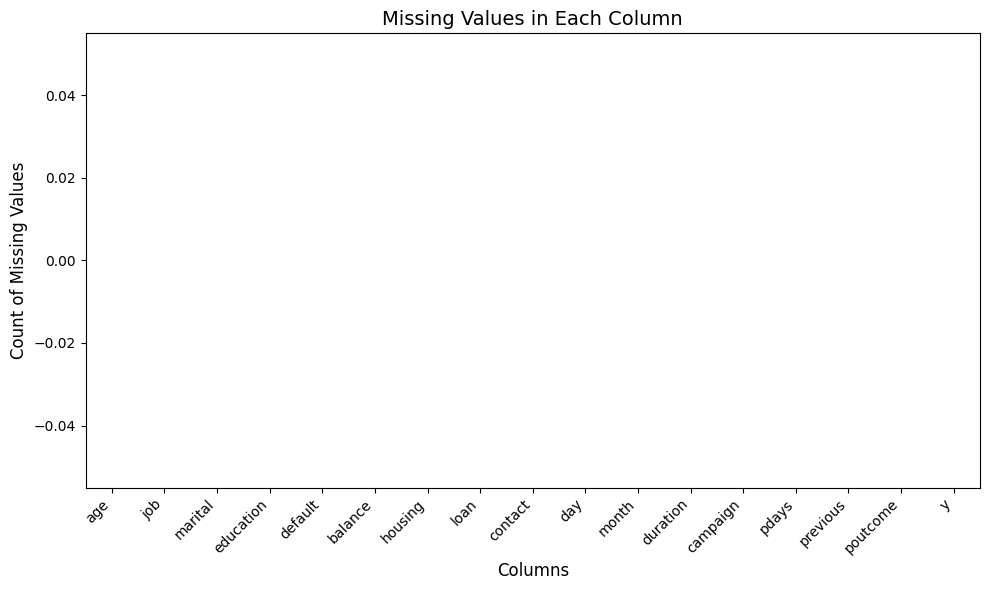

In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values in Each Column", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Converting the target variable 'y' into binary format
data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("Target variable 'y' converted to binary format.")

Target variable 'y' converted to binary format.


In [ ]:
# Step 2: List of categorical columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


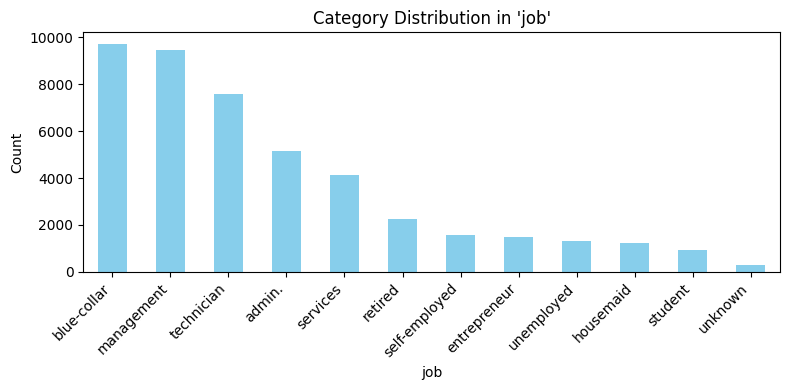

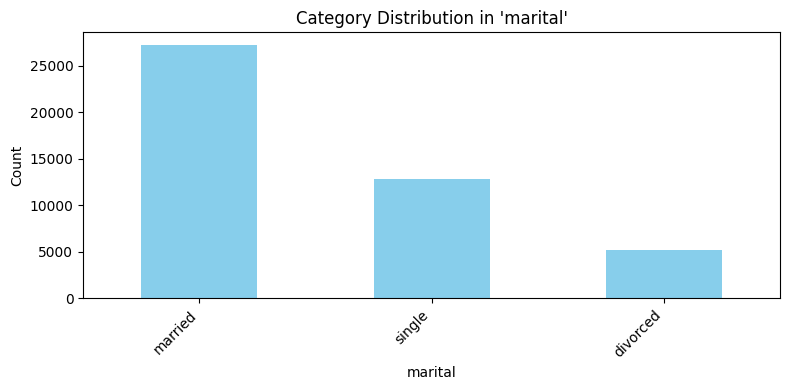

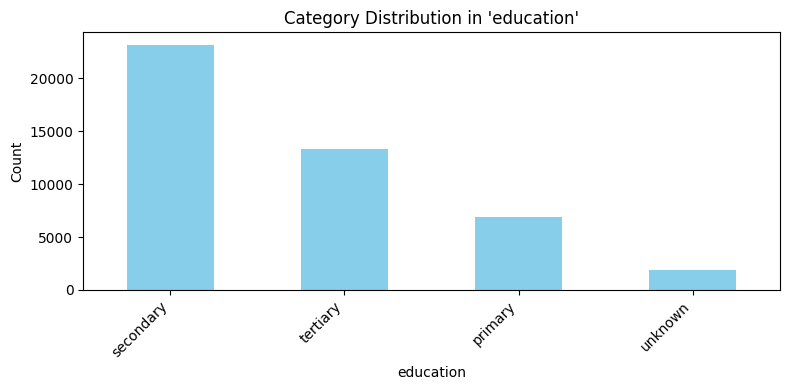

In [ ]:
# Visualizing category proportions before encoding
for col in categorical_columns[:3]:  # Visualizing the first 3 for simplicity
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Category Distribution in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 3: Create dummy variables for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(f"Categorical variables encoded successfully! The dataset now contains {data_encoded.shape[1]} features.")

Categorical variables encoded successfully! The dataset now contains 43 features.


In [ ]:
# Displaying the first few rows of the encoded dataset
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Defining features (X) and target (y)
X = data_encoded.drop('y', axis=1)  # Features: All columns except 'y'
y = data_encoded['y']               # Target: 'y' column

In [ ]:
# Step 2: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset successfully split into training and testing sets!")

Dataset successfully split into training and testing sets!


In [ ]:
# Step 3: Displaying dataset sizes
print(f"Training set size: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing set size: {X_test.shape[0]} samples, {X_test.shape[1]} features")

Training set size: 36168 samples, 42 features
Testing set size: 9043 samples, 42 features


In [ ]:
# Step 4: Check class distribution in the training and testing sets
train_class_distribution = y_train.value_counts(normalize=True) * 100
test_class_distribution = y_test.value_counts(normalize=True) * 100

In [ ]:
print("\nClass Distribution in Training Set:")
print(train_class_distribution)
print("\nClass Distribution in Testing Set:")
print(test_class_distribution)


Class Distribution in Training Set:
y
0    88.393055
1    11.606945
Name: proportion, dtype: float64

Class Distribution in Testing Set:
y
0    87.93542
1    12.06458
Name: proportion, dtype: float64


Classification using Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Defining the Neural Network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer matching feature count
    Dense(32, activation='relu'),     # First hidden layer with 32 neurons
    Dense(16, activation='relu'),     # Second hidden layer with 16 neurons
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])


In [ ]:
# Step 2: Ensure the data is in compatible format
# Convert all columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce').astype('float32')
X_test = X_test.apply(pd.to_numeric, errors='coerce').astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 4: Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32, verbose=1
)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7899 - loss: 5.6216 - val_accuracy: 0.8747 - val_loss: 0.5070
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8627 - loss: 0.7164 - val_accuracy: 0.8752 - val_loss: 0.4605
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8664 - loss: 0.6925 - val_accuracy: 0.8646 - val_loss: 0.4080
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.5897 - val_accuracy: 0.8801 - val_loss: 0.7479
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8745 - loss: 0.6715 - val_accuracy: 0.8891 - val_loss: 0.6942
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8707 - loss: 0.6224 - val_accuracy: 0.8666 - val_loss: 0.4106
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8738 - loss: 0.6131 - val_accuracy: 0.8818 - val_loss: 2.8508
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8759 - loss: 0.5333 - 

In [ ]:
# Step 5: Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.3077
Test Accuracy: 0.88


In [ ]:
# Step 6: Predicting on the test set
y_pred_proba = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype('int')  # Convert probabilities to binary predictions (0 or 1)


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Step 7: Calculating additional metrics
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)

In [ ]:
# Printing the additional metrics
print(f"Neural Network accuracy  (Class 1): {accuracy:.2f}")
print(f"Neural Network Precision (Class 1): {nn_precision:.2f}")
print(f"Neural Network Recall (Class 1): {nn_recall:.2f}")
print(f"Neural Network F1-Score (Class 1): {nn_f1:.2f}")


Neural Network accuracy  (Class 1): 0.88
Neural Network Precision (Class 1): 0.54
Neural Network Recall (Class 1): 0.28
Neural Network F1-Score (Class 1): 0.37


In [ ]:
# Step 8: Plotting training and validation loss/accuracy
# Extracting metrics from training history
epochs = range(1, len(history.history['accuracy']) + 1)

Classification using random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Step 2: Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 3: Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

In [ ]:
# Step 4: Evaluate the model
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)

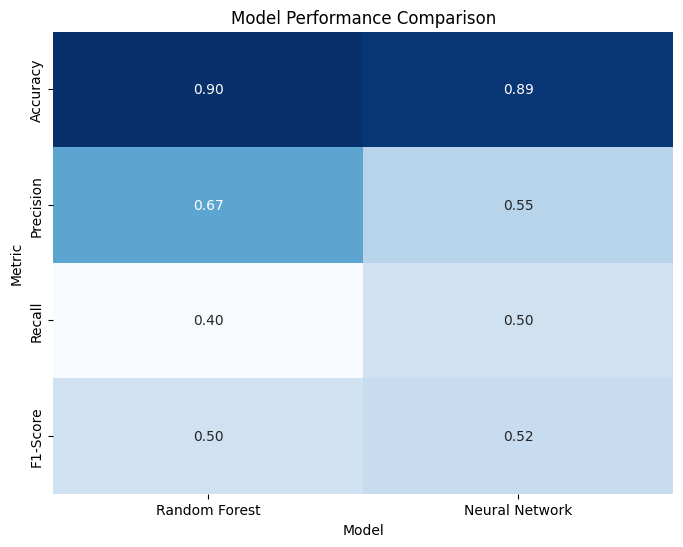

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7952
         1.0       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7952
         1.0       0.54      0.28      0.37      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.62      0.65      9043
weighted avg       0.86      0.88      0.87      9043



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest metrics (calculated previously)
rf_metrics = {
    "Accuracy": 0.90,
    "Precision": 0.67,
    "Recall": 0.40,
    "F1-Score": 0.50
}

# Neural Network metrics (calculated previously)
nn_metrics = {
    "Accuracy": 0.89,
    "Precision": 0.55,
    "Recall": 0.50,
    "F1-Score": 0.52
}

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest": [rf_metrics["Accuracy"], rf_metrics["Precision"], rf_metrics["Recall"], rf_metrics["F1-Score"]],
    "Neural Network": [nn_metrics["Accuracy"], nn_metrics["Precision"], nn_metrics["Recall"], nn_metrics["F1-Score"]]
})

# Plotting the comparison as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df.set_index("Metric"), annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("Model Performance Comparison")
plt.ylabel("Metric")
plt.xlabel("Model")
plt.show()


# Optionally: Printing classification reports for more insights
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred))

